# Strategy Simulation (fast version)

In [1]:
import financial.data as fd
import financial.portfolio as fp
import financial.strategies.simulation as fss

import os

In [2]:
from financial.io.cache import NoUpdateStrategy
from financial.io.file.cache import FileCache

print(os.environ["DATA"])
print(os.environ["CACHE"])
ds = fd.CachedDataStore(path=os.environ["DATA"], cache=FileCache(cache_path=os.environ["CACHE"]+"/", update_strategy=NoUpdateStrategy()))

print(ds)

..\acci-data-history
..\acci-cache
CachedDataStore with 907 data sources [cache stats: {'size': 0, 'hit': 0, 'miss': 0, 'write': 0, 'read': 0, 'update': 0}]


# Signals

In [3]:
import financial.strategies.technical.indicator as st

# Momentum
    
momentum1m = st.Momentum()
momentum1m.set_parameters({'delay': 20})

momentum3m = st.Momentum()
momentum3m.set_parameters({'delay': 60})

momentum4m = st.Momentum()
momentum4m.set_parameters({'delay': 84})

momentum6m = st.Momentum()
momentum6m.set_parameters({'delay': 126})

momentum8m = st.Momentum()
momentum8m.set_parameters({'delay': 168})

momentum9m = st.Momentum()
momentum9m.set_parameters({'delay': 189})
       
momentum1y = st.Momentum()
momentum1y.set_parameters({'delay': 252})
    
# Aggregation

indicator_ferrer = st.Mean()
indicator_ferrer.set_parameters({'components': [momentum4m.to_dict(), momentum6m.to_dict(), momentum8m.to_dict()]})
print(indicator_ferrer.to_dict())    
    
indicator_requejo = st.Mean() # st.Sum() # Average instead of sum to make it comparable
indicator_requejo.set_parameters({'components': [momentum1m.to_dict(), momentum3m.to_dict(), momentum6m.to_dict(), momentum9m.to_dict(), momentum1y.to_dict()]})
print(indicator_requejo.to_dict())    


{'type': 'financial.strategies.technical.indicator.Mean', 'components': [{'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 84}, {'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 126}, {'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 168}]}
{'type': 'financial.strategies.technical.indicator.Mean', 'components': [{'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 20}, {'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 60}, {'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 126}, {'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 189}, {'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 252}]}


# Strategies

In [4]:
import financial.strategies.allocation as fsa
import financial.strategies.filter as fsf
import financial.strategies.rank as fsr

# Asset Universe

universe_ferrer = ['XLI', 'XLF', 'XLV', 'XLK', 'XLC', 'XLU', 'XLY', 'XLB', 'XLE', 'XLP',
                    'TLT', 'TIP', 'IEF', 'SHY', 'AGG', 'VNQ', 'GLD', 'DBC'] # IAU excluded
    
universe_requejo = ['XLE', 'XLF', 'XLU', 'XLI', 'XLK', 'XLV', 'XLY', 'XLP', 'XLB', 'XOP',
                    'XHB', 'XME', 'XRT', 'XTL', 'TLT', 'DBC']
    
universe_ing = ['XLI', 'XLF', 'XLV', 'XLK', 'XLY', 'XLB', 'XLP', 
                'SPY', 'DJE', 'NASD', 
                'IOGP', 'IQQH', 'RBOT', 'HEAL', 
                'PHAU', 'LYTR', 'GLRE']

universe_ing_eur = ['ZPDM', 'ZPDI', 'ZPDS', 'ZPDH', 'ZPDT', 'ZPDD', 'ZPDF',
                   'SPY5', 'DJE', 'UST', 'LYTR', 'IQQH'] # , 'IOGP', 'GLRE', 'PHAU', 'HEAL', 'RBOT']

from typing import List

def universe_report(tickers: List[str]):
    for ticker in tickers:
        metadata = ds.get_metadata(ticker)
        #print(metadata)
        print(f"{ticker:4} {metadata['currency']} {metadata['since']} {metadata['isin']} {metadata['description']}")

print("HUGO FERRER'S UNIVERSE")
universe_report(universe_ferrer)

print("DANIEL REQUEJO'S UNIVERSE")
universe_report(universe_requejo)

print("ING'S UNIVERSE")
universe_report(universe_ing)

print("ING'S UNIVERSE [EUR]")
universe_report(universe_ing_eur)


# Asset ranking strategies

ferrer_refuge = None # refuge
ferrer_filter = fsf.CompositeAssetFilter( [fsf.TopKAssetFilter(k=10), fsf.MinimumValueAssetFilter(threshold=0.0)] )
ferrer_allocation = fsa.FixedWeightAllocation(0.10)
ferrer_strategy = fsr.AssetRankingStrategy("HUGO FERRER'S STRATEGY", universe_ferrer,indicator_ferrer, ferrer_filter, ferrer_allocation, ferrer_refuge)
print(ferrer_strategy)

requejo_filter = fsf.TopKAssetFilter(k=3)
requejo_allocation = fsa.EqualWeightAllocation()
requejo_strategy = fsr.AssetRankingStrategy("DANIEL REQUEJO'S STRATEGY", universe_requejo, indicator_requejo, requejo_filter, requejo_allocation)    
print(requejo_strategy)

ferrer_strategy_ing = fsr.AssetRankingStrategy("ING @ Ferrer's strategy", universe_ing_eur, indicator_ferrer, ferrer_filter, ferrer_allocation)
print(ferrer_strategy_ing)

requejo_strategy_ing = fsr.AssetRankingStrategy("ING @ Requejo's strategy", universe_ing_eur, indicator_requejo, requejo_filter, requejo_allocation)
print(requejo_strategy_ing)


HUGO FERRER'S UNIVERSE
XLI  USD 02/01/2001 US81369Y7040 Industrial SPDR Select Sector ETF
XLF  USD 30/03/2001 US81369Y6059 Financial SPDR Select Sector ETF
XLV  USD 02/01/2001 US81369Y2090 Health Care SPDR Select Sector ETF
XLK  USD 02/01/2001 US81369Y8030 Technology SPDR Select Sector ETF
XLC  USD 20/06/2018 US81369Y8527 Communication Services SPDR Select Sector ETF
XLU  USD 27/11/2017 US81369Y8865 Utilities SPDR Select Sector ETF
XLY  USD 02/01/2001 US81369Y4070 Consumer Discretionary SPDR Select Sector ETF
XLB  USD 02/01/2001 US81369Y1001 Materials SPDR Select Sector ETF
XLE  USD 30/03/2001 US81369Y5069 Energy SPDR Select Sector ETF
XLP  USD 02/01/2001 US81369Y3080 Consumer Staples SPDR Select Sector ETF
TLT  USD 30/07/2002 US4642874329 US Bond 20+yr iShares ETF
TIP  USD 05/12/2003 US4642871762 US TIPS Bond iShares ETF
IEF  USD 07/07/2015 US4642874402 US Bond 7-10yr iShares ETF NASDAQ
SHY  USD 07/07/2015 US4642874576 US Bond 1-3yr iShares ETF NASDAQ
AGG  USD 29/09/2003 US4642872265 

# Porfolio performance

In [5]:
portfolio = fp.StockPortfolio("Stocks")
portfolio.add('$$$', '2001-01-01', 1000000, 1000000)

print(portfolio)

for ticker in portfolio.lots:
    print(portfolio.lots[ticker])
    
print(f"- Cost:  ${portfolio.cost():10.2f}")
print(f"- Value: ${portfolio.value(ds):10.2f}")
print(f"- Gain:  ${portfolio.gain(ds):>10.2f}  {100*portfolio.gain(ds)/portfolio.cost():>6.2f}%")
print()

fss.SimulationReport.value_report(ds,portfolio,start_year=2000)
print()
fss.SimulationReport.performance_report(ds,portfolio,start_year=2000)
fss.SimulationReport.performance_report_stocks(ds,portfolio,start_year=2000)


Stocks: ['$$$']
$$$: [{'index': '2001-01-01', 'stocks': 1000000, 'cost': 1000000}]
- Cost:  $1000000.00
- Value: $1000000.00
- Gain:  $      0.00    0.00%

           YEAR        Jan        Feb        Mar        Apr        May        Jun        Jul        Aug        Sep        Oct        Nov        Dec
  2000:       0.00                                                                                                
  2001: 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00
  2002: 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00
  2003: 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00
  2004: 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00 1000000.00

  2020:    0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%
  2021:    0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%
  2022:    0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%
  2023:    0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%   0.00%


In [6]:
import financial.portfolios.statistics as fps

assets = {'^GSPC': 1.0}
target = fp.WeightedPortfolio.from_assets("Target", assets)
print(target)

print("Daily returns")
benchmark_returns = target.returns(ds,'2015-12-31','2023-12-31')
print(benchmark_returns)
print("Monthly returns")
benchmark_monthly_returns = fss.SimulationUtilities.monthly_returns(ds,target,2016,2023)
print(benchmark_monthly_returns)
benchmark_cumulative_returns = fps.CumulativeReturn().get_series(benchmark_monthly_returns)
print("Cumulative returns")
print(benchmark_cumulative_returns)


fss.SimulationReport.performance_report(ds, target, 2001)

print("\n Cumulative return")
fss.SimulationReport.cumulative_report(ds, target, 2001)


Target:
      ticker  weight  cost  isin description
^GSPC  ^GSPC     1.0  None  None        None
Daily returns
2016-01-04   -0.015304
2016-01-05    0.002012
2016-01-06   -0.013115
2016-01-07   -0.023700
2016-01-08   -0.010838
                ...   
2023-06-20   -0.004735
2023-06-21   -0.005245
2023-06-22    0.003711
2023-06-23   -0.007659
2023-06-26   -0.004487
Length: 1882, dtype: float64
Monthly returns
2016-01-31   -0.050735
2016-02-29   -0.004128
2016-03-31    0.065991
2016-04-30    0.002699
2016-05-31    0.015325
                ...   
2023-08-31    0.000000
2023-09-30    0.000000
2023-10-31    0.000000
2023-11-30    0.000000
2023-12-31    0.000000
Name: return, Length: 96, dtype: float64
Cumulative returns
2016-01-31   -0.050735
2016-02-29   -0.054654
2016-03-31    0.007730
2016-04-30    0.010450
2016-05-31    0.025935
                ...   
2023-08-31    1.117880
2023-09-30    1.117880
2023-10-31    1.117880
2023-11-30    1.117880
2023-12-31    1.117880
Name: return, Length: 96

# Strategy simulation 

In [7]:
%%time
import financial.strategies.rebalance as fsrebalance

strategy = ferrer_strategy #ferrer_strategy_ing #ferrer_strategy
benchmark = fp.BenchmarkPortfolio("^GSPC")
market = ds.get_data("^GSPC")
rebalancing = fsrebalance.MonthlyRebalancingSchedule(+2,market) # +1 first day, -1 last day

print("STRATEGY")
print(strategy)
print("BENCHMARK")
print(benchmark)
print("REBALANCING")
print(rebalancing)
        
simulation = fss.FastStockStrategySimulation(ds, strategy, rebalancing, market)
#simulation.verbose = True  # verbose 30.4s vs. 15.4s without trading details
simulation.simulate(start_year=2016, end_year=2023)


STRATEGY
HUGO FERRER'S STRATEGY
- 18 asset universe: ['XLI', 'XLF', 'XLV', 'XLK', 'XLC', 'XLU', 'XLY', 'XLB', 'XLE', 'XLP', 'TLT', 'TIP', 'IEF', 'SHY', 'AGG', 'VNQ', 'GLD', 'DBC']
- Indicator: {'type': 'financial.strategies.technical.indicator.Mean', 'components': [{'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 84}, {'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 126}, {'type': 'financial.strategies.technical.indicator.Momentum', 'delay': 168}]}
BENCHMARK
^GSPC(^GSPC)
REBALANCING
Rebalancing schedule: Monthly rebalancing on 2
SIMULATING 2016...
+ Rebalance @ 2015-12-01
{'XLY': 0.1, 'XLK': 0.1, 'XLP': 0.1, 'VNQ': 0.1, 'IEF': 0.1, 'XLF': 0.1, 'TLT': 0.1, 'XLI': 0.1, 'AGG': 0.1, '$$$': 0.10000000000000009}
+ Trade @ 2015-12-02
- Changes: {'XLI': 1836, 'XLF': 5016, 'AGG': 920, 'XLK': 2269, 'XLY': 1236, 'VNQ': 1268, 'XLP': 2016, 'TLT': 813, 'IEF': 938, '$$$': -899673.4458160399}
- Rotation: 89.97%
+ Rebalance @ 2015-12-31
{'VNQ': 0.1, 'XLP': 0.

- Changes: {'XLI': -26, 'XLF': 32, 'GLD': 857, 'XLK': -47, 'XLY': -28, 'DBC': -6732, 'VNQ': 1234, 'XLB': -24, 'XLP': 7, 'XLU': 5, '$$$': 46.256263732968364, 'XLE': -1461, 'XLV': -18}
- Rotation: 20.13%
+ Rebalance @ 2017-06-01
{'XLK': 0.1, 'XLY': 0.1, 'XLU': 0.1, 'XLI': 0.1, 'XLF': 0.1, 'XLP': 0.1, 'XLV': 0.1, 'XLB': 0.1, 'GLD': 0.1, 'AGG': 0.1}
+ Trade @ 2017-06-02
- Changes: {'XLI': -4, 'XLF': 141, 'GLD': 6, 'XLK': -31, 'XLY': 2, 'VNQ': -1234, 'AGG': 956, 'XLB': 21, 'XLP': -44, 'XLU': -58, '$$$': 47.67484283450176, 'XLV': 4}
- Rotation: 10.54%
+ Rebalance @ 2017-06-30
{'XLV': 0.1, 'XLI': 0.1, 'XLK': 0.1, 'XLF': 0.1, 'XLY': 0.1, 'XLB': 0.1, 'XLU': 0.1, 'XLP': 0.1, 'VNQ': 0.1, 'TLT': 0.1}
+ Trade @ 2017-07-03
- Changes: {'XLI': -25, 'XLF': -330, 'GLD': -863, 'XLK': 73, 'XLY': 20, 'VNQ': 1232, 'AGG': -956, 'XLB': -37, 'XLP': 57, 'TLT': 834, 'XLU': 72, '$$$': 12.342910766688874, 'XLV': -48}
- Rotation: 21.21%
+ Rebalance @ 2017-08-01
{'XLK': 0.1, 'XLV': 0.1, 'XLF': 0.1, 'XLU': 0.1, 'XLY'

- Rotation: 30.61%
+ Rebalance @ 2018-11-30
{'XLV': 0.1, 'XLU': 0.1, 'XLP': 0.1, 'VNQ': 0.1, 'XLY': 0.1, 'IEF': 0.1, 'SHY': 0.1, 'AGG': 0.1, '$$$': 0.20000000000000007}
+ Trade @ 2018-12-03
- Changes: {'AGG': 965, 'SHY': 24, 'XLK': -1438, 'XLY': 5, 'VNQ': -39, 'XLP': 2, 'IEF': 994, 'XLU': -58, '$$$': -94156.82019042963, 'XLV': -47}
- Rotation: 20.25%
+ Rebalance @ 2018-12-31
{'IEF': 0.1, 'XLU': 0.1, 'TLT': 0.1, 'AGG': 0.1, 'GLD': 0.1, 'XLV': 0.1, 'SHY': 0.1, '$$$': 0.30000000000000004}
FINAL PORTFOLIO @ 2018
Stocks: ['$$$', 'XLI', 'XLF', 'XLK', 'XLY', 'DBC', 'XLB', 'TLT', 'XLU', 'XLE', 'XLV', 'XLP', 'GLD', 'TIP', 'SHY', 'VNQ', 'AGG', 'IEF']
Portfolio value: 995012.38
Portfolio assets: {'$$$': 202557.50739669934, 'XLI': 0.0, 'XLF': 0.0, 'XLK': 0.0, 'XLY': 91089.20196533203, 'DBC': 0.0, 'XLB': 0.0, 'TLT': 0.0, 'XLU': 95414.7566986084, 'XLE': 0.0, 'XLV': 91787.11226654053, 'XLP': 91251.65780639648, 'GLD': 0.0, 'TIP': 0.0, 'SHY': 101849.16334533691, 'VNQ': 91646.52962493896, 'AGG': 102762.

{'TLT': 0.1, 'XLK': 0.1, 'GLD': 0.1, 'IEF': 0.1, 'AGG': 0.1, 'TIP': 0.1, 'XLC': 0.1, 'SHY': 0.1, 'XLU': 0.1, 'XLV': 0.1}
+ Trade @ 2020-03-02
- Changes: {'XLI': -1244, 'AGG': 843, 'SHY': 1142, 'XLY': -799, 'XLP': -1598, 'IEF': 835, 'XLC': 12, 'XLU': 26, '$$$': 207.43240356448223, 'GLD': -25, 'TIP': 812, 'TLT': -57, 'XLF': -3344}
- Rotation: 40.24%
+ Rebalance @ 2020-04-01
{'TLT': 0.1, 'IEF': 0.1, 'GLD': 0.1, 'SHY': 0.1, 'AGG': 0.1, 'TIP': 0.1, '$$$': 0.4}
+ Trade @ 2020-04-02
- Changes: {'AGG': -31, 'SHY': -66, 'XLK': -1045, 'IEF': -70, 'XLC': -1861, 'XLU': -1485, '$$$': 372200.51111221325, 'GLD': -42, 'TIP': -37, 'TLT': -81, 'XLV': -1008}
- Rotation: 39.94%
+ Rebalance @ 2020-05-01
{'TLT': 0.1, 'GLD': 0.1, 'IEF': 0.1, 'AGG': 0.1, 'TIP': 0.1, 'XLK': 0.1, 'XLV': 0.1, 'SHY': 0.1, '$$$': 0.20000000000000007}
+ Trade @ 2020-05-04
- Changes: {'AGG': -9, 'SHY': 7, 'XLK': 1042, 'IEF': 6, '$$$': -184529.4508590697, 'GLD': -28, 'TLT': 6, 'XLV': 960}
- Rotation: 20.25%
+ Rebalance @ 2020-06-01
{

+ Rebalance @ 2021-11-01
{'XLY': 0.1, 'DBC': 0.1, 'XLK': 0.1, 'VNQ': 0.1, 'XLF': 0.1, 'XLE': 0.1, 'XLV': 0.1, 'XLU': 0.1, 'XLP': 0.1, 'XLI': 0.1}
+ Trade @ 2021-11-02
- Changes: {'XLI': -3, 'XLF': -15, 'XLK': -26, 'XLY': -43, 'DBC': 137, 'VNQ': -4, 'XLP': 1780, 'TLT': -830, 'XLC': -1510, 'XLU': 1903, '$$$': -286.2705841063289, 'XLE': 9, 'XLV': -8}
- Rotation: 20.26%
+ Rebalance @ 2021-12-01
{'XLK': 0.1, 'XLY': 0.1, 'TLT': 0.1, 'XLE': 0.1, 'DBC': 0.1, 'XLV': 0.1, 'VNQ': 0.1, 'XLF': 0.1, 'TIP': 0.1, 'XLB': 0.1}
+ Trade @ 2021-12-02
- Changes: {'XLI': -1217, 'XLF': 58, 'XLK': -44, 'XLY': -16, 'DBC': 474, 'VNQ': -8, 'TIP': 963, 'XLB': 1459, 'XLP': -1780, 'TLT': 818, 'XLU': -1903, '$$$': 474.7345275878906, 'XLE': 35, 'XLV': 6}
- Rotation: 31.16%
+ Rebalance @ 2021-12-31
{'XLK': 0.1, 'XLY': 0.1, 'VNQ': 0.1, 'DBC': 0.1, 'XLE': 0.1, 'XLV': 0.1, 'XLP': 0.1, 'XLU': 0.1, 'XLB': 0.1, 'XLF': 0.1}
FINAL PORTFOLIO @ 2021
Stocks: ['$$$', 'XLI', 'XLF', 'XLK', 'XLY', 'DBC', 'XLB', 'XLP', 'XLC', 'XLU', '

{'XLC': 0.1, 'XLK': 0.1, 'GLD': 0.1, 'XLI': 0.1, 'XLB': 0.1, 'XLP': 0.1, 'XLY': 0.1, 'XLV': 0.1, 'IEF': 0.1, 'AGG': 0.1}
+ Trade @ 2023-05-02
- Changes: {'XLI': 11, 'AGG': -4, 'SHY': -1180, 'XLY': 656, 'XLP': -44, 'IEF': 966, 'XLC': -27, '$$$': -32.716567993105855, 'GLD': -12, 'TIP': -878, 'XLB': 14, 'XLE': -1119, 'XLV': 720}
- Rotation: 30.21%
+ Rebalance @ 2023-06-01
{'XLK': 0.1, 'XLC': 0.1, 'GLD': 0.1, 'XLY': 0.1, 'XLI': 0.1, 'TIP': 0.1, 'IEF': 0.1, 'AGG': 0.1, 'XLP': 0.1, 'SHY': 0.1}
+ Trade @ 2023-06-02
- Changes: {'XLI': -2, 'AGG': 26, 'SHY': 1196, 'XLK': -59, 'XLY': -35, 'XLP': 76, 'IEF': 34, 'XLC': -96, '$$$': 26.010292053309968, 'GLD': 23, 'TIP': 904, 'XLB': -1207, 'XLV': -720}
- Rotation: 21.60%
FINAL PORTFOLIO @ 2023
Stocks: ['$$$', 'XLI', 'XLF', 'XLE', 'XLP', 'XLV', 'GLD', 'XLK', 'VNQ', 'XLB', 'XLC', 'TIP', 'SHY', 'AGG', 'XLY', 'IEF']
Portfolio value: 980827.55
Portfolio assets: {'$$$': 75.10711669977172, 'XLI': 100495.09941101074, 'XLF': 0.0, 'XLE': 0.0, 'XLP': 97669.35636

In [8]:
simulation.portfolio_target_report()


2015-12-01: {'XLY': 0.1, 'XLK': 0.1, 'XLP': 0.1, 'VNQ': 0.1, 'IEF': 0.1, 'XLF': 0.1, 'TLT': 0.1, 'XLI': 0.1, 'AGG': 0.1, '$$$': 0.1}
2015-12-31: {'VNQ': 0.1, 'XLP': 0.1, 'XLK': 0.1, 'XLY': 0.1, 'XLU': 0.1, 'TLT': 0.1, 'XLF': 0.1, 'XLV': 0.1, 'XLI': 0.1, 'IEF': 0.1}
2016-02-01: {'XLU': 0.1, 'XLP': 0.1, 'TLT': 0.1, 'IEF': 0.1, 'VNQ': 0.1, 'AGG': 0.1, 'SHY': 0.1, 'XLK': 0.1, '$$$': 0.2}
2016-03-01: {'XLU': 0.1, 'TLT': 0.1, 'XLP': 0.1, 'GLD': 0.1, 'VNQ': 0.1, 'IEF': 0.1, 'AGG': 0.1, 'XLK': 0.1, 'TIP': 0.1, 'XLI': 0.1}
2016-04-01: {'XLU': 0.1, 'GLD': 0.1, 'XLP': 0.1, 'VNQ': 0.1, 'TLT': 0.1, 'XLK': 0.1, 'XLI': 0.1, 'XLB': 0.1, 'IEF': 0.1, 'TIP': 0.1}
2016-04-29: {'GLD': 0.1, 'XLU': 0.1, 'XLB': 0.1, 'TLT': 0.1, 'XLI': 0.1, 'XLP': 0.1, 'XLE': 0.1, 'VNQ': 0.1, 'IEF': 0.1, 'TIP': 0.1}
2016-06-01: {'XLB': 0.1, 'XLU': 0.1, 'VNQ': 0.1, 'XLI': 0.1, 'GLD': 0.1, 'XLE': 0.1, 'XLP': 0.1, 'DBC': 0.1, 'XLK': 0.1, 'TLT': 0.1}
2016-07-01: {'XLU': 0.1, 'GLD': 0.1, 'TLT': 0.1, 'VNQ': 0.1, 'DBC': 0.1, 'XLE': 0

In [9]:
simulation.simulation_trading_report()

2015-12-02: 89.97% {'XLI': 1836, 'XLF': 5016, 'AGG': 920, 'XLK': 2269, 'XLY': 1236, 'VNQ': 1268, 'XLP': 2016, 'TLT': 813, 'IEF': 938, '$$$': -899673.4458160399}
2016-01-04: 21.01% {'XLI': 38, 'XLF': 147, 'AGG': -920, 'XLK': 50, 'XLY': 40, 'VNQ': -23, 'XLP': -49, 'TLT': -5, 'IEF': -13, 'XLU': 2269, '$$$': -100421.79171371451, 'XLV': 1386}
2016-02-02: 40.32% {'XLI': -1874, 'XLF': -5163, 'AGG': 880, 'XLK': 48, 'XLY': -1276, 'SHY': 1132, 'VNQ': 14, 'XLP': -53, 'TLT': -62, 'IEF': -46, 'XLU': -179, '$$$': 192588.40593338024, 'XLV': -1386}
2016-03-02: 30.35% {'XLI': 1829, 'AGG': 8, 'XLK': -67, 'SHY': -1132, 'VNQ': -34, 'GLD': 819, 'TIP': 863, 'XLP': -27, 'TLT': 8, 'IEF': 10, 'XLU': 10, '$$$': -192270.22172546378}
2016-04-04: 10.90% {'XLI': -13, 'AGG': -888, 'XLK': -53, 'VNQ': -28, 'XLP': -22, 'IEF': 18, 'XLU': -83, '$$$': -47.061180114687886, 'GLD': 42, 'TIP': 7, 'XLB': 2240, 'TLT': 10}
2016-05-02: 10.85% {'XLI': -38, 'XLK': -2247, 'VNQ': 10, 'XLP': 31, 'IEF': 9, 'XLU': 38, '$$$': -115.763603

2019-12-02: 20.47% {'XLI': 7, 'XLK': -27, 'VNQ': -1158, 'XLP': -46, 'IEF': -971, 'XLC': 2080, 'XLU': 16, '$$$': -282.40977478030254, 'GLD': 24, 'TLT': 2, 'XLF': -76, 'XLV': 1093}
2020-01-02: 99.96% {'GLD': 694, 'XLI': 1204, 'XLK': 1070, 'VNQ': 1090, 'XLB': 1647, 'XLP': 1600, 'XLC': 1842, 'XLU': 1567, 'XLF': 3217, '$$$': -999573.3531246185, 'XLV': 979}
2020-02-03: 21.02% {'XLI': 40, 'XLF': 127, 'XLK': -25, 'XLY': 799, 'VNQ': -1090, 'XLB': -1647, 'XLV': 29, 'XLP': -2, 'TLT': 693, 'XLC': 7, 'XLU': -108, '$$$': -484.33720970142167, 'GLD': -13}
2020-03-02: 40.24% {'XLI': -1244, 'AGG': 843, 'SHY': 1142, 'XLY': -799, 'XLP': -1598, 'IEF': 835, 'XLC': 12, 'XLU': 26, '$$$': 207.43240356448223, 'GLD': -25, 'TIP': 812, 'TLT': -57, 'XLF': -3344}
2020-04-02: 39.94% {'AGG': -31, 'SHY': -66, 'XLK': -1045, 'IEF': -70, 'XLC': -1861, 'XLU': -1485, '$$$': 372200.51111221325, 'GLD': -42, 'TIP': -37, 'TLT': -81, 'XLV': -1008}
2020-05-04: 20.25% {'AGG': -9, 'SHY': 7, 'XLK': 1042, 'IEF': 6, '$$$': -184529.450

In [10]:
rotation = simulation.monthly_rotation()
print(f"Average monthly rotation: {100*rotation:.2f}%")

Average monthly rotation: 25.91%


In [11]:
year_returns = simulation.year_returns()
#print(year_returns)

print("\nSTRATEGY RETURNS")
for year in year_returns:
    print(f"{year}: {100*year_returns[year]:6.2f}%")
    

cumulative = simulation.cumulative_returns(year_returns)

print("\nCUMULATIVE RETURNS")
for year in cumulative:
    print(f"{year}: {100*cumulative[year]:6.2f}%")



STRATEGY RETURNS
2016:   9.55%
2017:  12.14%
2018:  -1.72%
2019:  13.26%
2020:  12.32%
2021:  26.90%
2022:  -7.27%
2023:  -0.10%

CUMULATIVE RETURNS
2016:   9.55%
2017:  22.84%
2018:  20.73%
2019:  36.74%
2020:  53.59%
2021:  94.91%
2022:  80.74%
2023:  80.56%


In [12]:
simulation.simulation_year_report()

2016
- Cost:  $1000000.00
- Value: $1087431.03
- Gain:  $  87431.03    8.74%
2017
- Cost:  $1000000.00
- Value: $1132940.75
- Gain:  $ 132940.75   13.29%
2018
- Cost:  $1000000.00
- Value: $ 995012.38
- Gain:  $  -4987.62   -0.50%
2019
- Cost:  $1000000.00
- Value: $1132622.60
- Gain:  $ 132622.60   13.26%
2020
- Cost:  $1000000.00
- Value: $1123193.03
- Gain:  $ 123193.03   12.32%
2021
- Cost:  $1000000.00
- Value: $1298175.43
- Gain:  $ 298175.43   29.82%
2022
- Cost:  $1000000.00
- Value: $ 955074.23
- Gain:  $ -44925.77   -4.49%
2023
- Cost:  $1000000.00
- Value: $ 980827.55
- Gain:  $ -19172.45   -1.92%


In [13]:
%%time

year = 2016
monthly_returns = simulation.monthly_returns(year)
#print(monthly_returns)
cumulative_returns = simulation.cumulative_returns(monthly_returns)
year_return = cumulative_returns[12]

print("Monthly returns")
returns_str = [f"{100*month_return:>6.2f}%" for month_return in monthly_returns.values()]
print(f"  {year}:           {100*year_return:>6.2f}% " + " ".join(returns_str))

print("Monthly cumulative returns")
returns_str = [f"{100*month_return:>6.2f}%" for month_return in cumulative_returns.values()]
print(f"  {year}:           {100*year_return:>6.2f}% " + " ".join(returns_str))

print()
print("SERIES")
print("Monthly returns")
monthly_returns = simulation.returns()
print(monthly_returns)
cumulative_returns = fps.CumulativeReturn().get_series(monthly_returns)
print("Cumulative returns")
print(cumulative_returns)

Monthly returns
  2016:             9.55%  -1.85%  -0.10%   3.77%   0.01%  -0.26%   4.05%   0.66%  -1.56%   2.54%  -2.68%   3.66%   1.19%
Monthly cumulative returns
  2016:             9.55%  -1.85%  -1.94%   1.76%   1.77%   1.50%   5.62%   6.32%   4.66%   7.31%   4.43%   8.25%   9.55%

SERIES
Monthly returns
2016-01-31   -0.018455
2016-02-29   -0.001004
2016-03-31    0.037736
2016-04-30    0.000102
2016-05-31   -0.002587
                ...   
2023-08-31    0.000000
2023-09-30    0.000000
2023-10-31    0.000000
2023-11-30    0.000000
2023-12-31    0.000000
Length: 96, dtype: float64
Cumulative returns
2016-01-31   -0.018455
2016-02-29   -0.019440
2016-03-31    0.017562
2016-04-30    0.017665
2016-05-31    0.015032
                ...   
2023-08-31    0.805589
2023-09-30    0.805589
2023-10-31    0.805589
2023-11-30    0.805589
2023-12-31    0.805589
Length: 96, dtype: float64
Wall time: 5.56 s


In [14]:
difference = monthly_returns - benchmark_monthly_returns
print(difference)

print("Better than benchmark")
print(sum(difference>0))
print(difference[difference>0])
print(sum(difference[difference>0]))

print("Worse than benchmark")
print(sum(difference<0))
print(difference[difference<0])
print(sum(difference[difference<0]))

2016-01-31    0.032280
2016-02-29    0.003124
2016-03-31   -0.028255
2016-04-30   -0.002598
2016-05-31   -0.017912
                ...   
2023-08-31    0.000000
2023-09-30    0.000000
2023-10-31    0.000000
2023-11-30    0.000000
2023-12-31    0.000000
Length: 96, dtype: float64
Better than benchmark
34
2016-01-31    0.032280
2016-02-29    0.003124
2016-06-30    0.039620
2016-09-30    0.026586
2016-11-30    0.002397
2017-08-31    0.006974
2017-12-31    0.001685
2018-03-31    0.012149
2018-04-30    0.009902
2018-09-30    0.002186
2018-10-31    0.019413
2018-11-30    0.002250
2018-12-31    0.061996
2019-05-31    0.025493
2019-08-31    0.035090
2020-01-31    0.004571
2020-02-29    0.025445
2020-03-31    0.116496
2020-09-30    0.012366
2020-10-31    0.010235
2021-01-31    0.002337
2021-02-28    0.037253
2021-03-31    0.000425
2021-04-30    0.001052
2021-05-31    0.016052
2021-09-30    0.004654
2022-01-31    0.033409
2022-02-28    0.025982
2022-04-30    0.056777
2022-05-31    0.014189
2022-

In [15]:
drawdown = fps.MaximumDrawdown().get_series(monthly_returns)
print(drawdown)
print(min(drawdown))

benchmark_drawdown = fps.MaximumDrawdown().get_series(benchmark_returns) # benchmark_monthly_returns)
print(benchmark_drawdown)
print(min(benchmark_drawdown))

2016-01-31   -0.018455
2016-02-29   -0.019440
2016-03-31    0.000000
2016-04-30    0.000000
2016-05-31   -0.002587
                ...   
2023-08-31   -0.079073
2023-09-30   -0.079073
2023-10-31   -0.079073
2023-11-30   -0.079073
2023-12-31   -0.079073
Length: 96, dtype: float64
-0.10986428212221011
2016-01-04   -0.015304
2016-01-05   -0.013322
2016-01-06   -0.026263
2016-01-07   -0.049341
2016-01-08   -0.059645
                ...   
2023-06-20   -0.085030
2023-06-21   -0.089829
2023-06-22   -0.086452
2023-06-23   -0.093448
2023-06-26   -0.097516
Length: 1882, dtype: float64
-0.3392496000265328


In [16]:
%%time

simulation.simulation_performance_report()

         return     YEAR     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep     Oct     Nov     Dec
  2016:    9.55%    9.55%  -1.85%  -0.10%   3.77%   0.01%  -0.26%   4.05%   0.66%  -1.56%   2.54%  -2.68%   3.66%   1.19%
  2017:   22.84%   12.14%   1.07%   1.38%  -0.53%   0.45%   1.12%   0.44%   1.18%   0.75%   0.50%   1.72%   2.30%   1.15%
  2018:   20.73%   -1.72%   4.32%  -4.50%  -1.47%   1.26%   1.49%  -0.09%   1.02%   2.00%   0.65%  -5.00%   2.01%  -2.98%
  2019:   36.74%   13.26%   1.59%   0.51%   1.72%   1.52%  -4.03%   3.81%   1.25%   1.70%   0.28%   1.46%   0.84%   2.06%
  2020:   53.59%   12.32%   0.29%  -5.87%  -0.86%   0.56%   1.65%   0.92%   5.03%   3.06%  -2.69%  -1.74%   8.75%   3.36%
  2021:   94.91%   26.90%  -0.88%   6.33%   4.29%   5.35%   2.15%   1.57%   1.16%   1.80%  -4.29%   6.06%  -2.63%   3.76%
  2022:   80.74%   -7.27%  -1.92%  -0.54%   3.11%  -3.12%   1.42%  -5.37%   1.21%  -0.08%  -3.03%   1.01%   1.91%  -1.79%
  2023:   80.56%   -0.10%

In [17]:
%%time

print("MONTHLY RETURNS")
fss.SimulationReport.simulation_report(monthly_returns, fss.accumulate_return)
print("CUMULATIVE RETURNS")
fss.SimulationReport.simulation_report(cumulative_returns, fss.accumulate_last)
print("SIMULATION DRAWDOWN")
fss.SimulationReport.simulation_report(drawdown, fss.accumulate_min)

MONTHLY RETURNS
          TOTAL     YEAR     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug     Sep     Oct     Nov     Dec
  2016:    9.55%    9.55%  -1.85%  -0.10%   3.77%   0.01%  -0.26%   4.05%   0.66%  -1.56%   2.54%  -2.68%   3.66%   1.19%
  2017:   22.84%   12.14%   1.07%   1.38%  -0.53%   0.45%   1.12%   0.44%   1.18%   0.75%   0.50%   1.72%   2.30%   1.15%
  2018:   20.73%   -1.72%   4.32%  -4.50%  -1.47%   1.26%   1.49%  -0.09%   1.02%   2.00%   0.65%  -5.00%   2.01%  -2.98%
  2019:   36.74%   13.26%   1.59%   0.51%   1.72%   1.52%  -4.03%   3.81%   1.25%   1.70%   0.28%   1.46%   0.84%   2.06%
  2020:   53.59%   12.32%   0.29%  -5.87%  -0.86%   0.56%   1.65%   0.92%   5.03%   3.06%  -2.69%  -1.74%   8.75%   3.36%
  2021:   94.91%   26.90%  -0.88%   6.33%   4.29%   5.35%   2.15%   1.57%   1.16%   1.80%  -4.29%   6.06%  -2.63%   3.76%
  2022:   80.74%   -7.27%  -1.92%  -0.54%   3.11%  -3.12%   1.42%  -5.37%   1.21%  -0.08%  -3.03%   1.01%   1.91%  -1.79%
  2023:  

STRATEGY vs. BENCHMARK


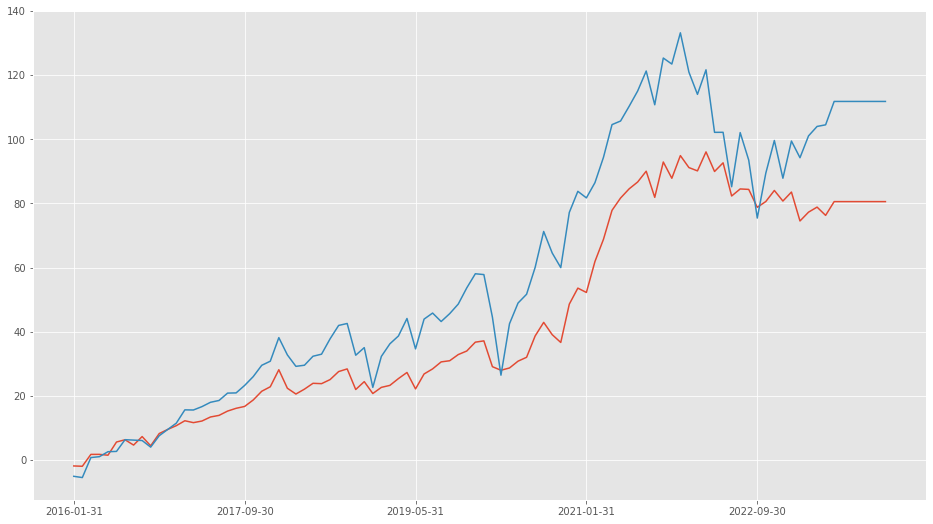

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl

mpl.rc('figure', figsize=(16, 9))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

benchmark = 100*benchmark_cumulative_returns
#benchmark = 100*fps.MaximumDrawdown().get_series(benchmark_monthly_returns)

data = 100*cumulative_returns
#data = 100*drawdown

#monthly_returns.plot(label=ticker)
data.plot()
benchmark.plot()
print("STRATEGY vs. BENCHMARK")